# EDA of Airfare Price Training Set

## Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# Label encoder
from sklearn.preprocessing import LabelEncoder

### Why rcParams?
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.rc convenience routine.

**Link**: https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

## Load Data

In [2]:
# Load training dataset
df = pd.read_csv('Airfare_Dataset.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Simple EDA

In [3]:
df.shape

(10683, 11)

In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Check for Duplications

In [6]:
# Number of duplicates
df.duplicated().sum()

220

In [7]:
# Check the duplicated rows
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [8]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True) # Keeps the first occurence & modifies the dataframe directly

In [9]:
# Check dataframe was dropped
df.shape

(10463, 11)

### Check for Null Values

In [10]:
## Any null values?
df.isnull().values.any()

True

In [11]:
# Null count
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Drop null values
df.dropna(inplace=True)

In [13]:
# Check dataframe was dropped
df.shape

(10462, 11)

### Check Uniqueness

In [14]:
# Unique count
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [15]:
# Check Airline
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
# Check Source
df['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
# Check Destination
df['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
# Check Total_Stops
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [19]:
# Check Additional_Info
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [20]:
# Replace 'No Info' is the same as 'No info'
df['Additional_Info'].replace('No Info', 'No info', inplace=True)

In [21]:
# Check Additional_Info has changed 'No Info' to 'No info'
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

## Feature Engineering

### Convert Total Stops
Convert the string representation to a number.

In [22]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10462, dtype: object

In [23]:
df['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
                          [0, 1, 2, 3, 4], inplace=True)

In [24]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

### Convert Duration Feature
Convert Duration column to total minutes. As of now it displays hours (h) and remaining minutes (min).

In [25]:
# Check Duration feature
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

The following is occuring in this cell below:
- Replacing 'h' (for hours) to '\*60' so multiplication can occur and convert to minutes (1h=60m).
- Replace the space between the hours and minutes to a '+' so it the converted minutes can be added to the remaining minutes.
- Convert 'm' (for minutes) to '\*1' since no converting is necessary since it is the remaining minutes.
- Applying eval function converts string to a executable code (https://stackoverflow.com/questions/9383740/what-does-pythons-eval-do). So the mathematical expression can be executed.

In [26]:
df['Duration']=df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [27]:
# Check Duration column (now in minutes)
df['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10462, dtype: int64

### Date Conversion

#### Date of Journey

In [28]:
# Check Date_of_Journey date format
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [29]:
# Retrieve the day from the Date_of_Journey as a separate column
df['Journey_Day']=df['Date_of_Journey'].str.split('/').str[0].astype(int)

In [30]:
# Retrieve the month from the Date_of_Journey as a separate column
df['Journey_Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)

In [31]:
# Retrieve the year from the Date_of_Journey as a separate column
df['Journey_Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [32]:
# Drop Date_of_Journey
df.drop(["Date_of_Journey"], axis=1, inplace=True)

#### Departure Time
The to_datetime function coverts string to a datetime object (https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [33]:
# Retrive the hour value from Dep_Time
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [34]:
# Retrive the minute value from Dep_Time
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [35]:
# Drop Dep_Time
df.drop(["Dep_Time"], axis=1, inplace=True)

#### Arrival Time

In [36]:
# Retrive the hour value from Arrival_Time
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [37]:
# Retrive the minute value from Arrival_Time
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [38]:
# Drop Dep_Time
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [39]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,2019,16,50,21,35


### EDA Visualizations

#### Price Distribution

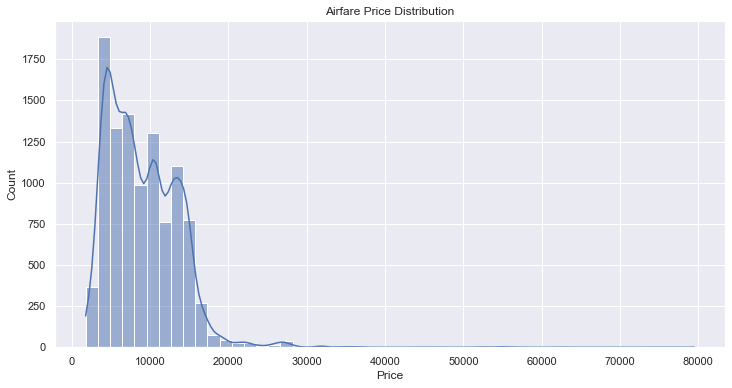

In [40]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="Price", kde=True, bins=50)
plt.title('Airfare Price Distribution')
plt.show()

#### Count of Flights Per Month

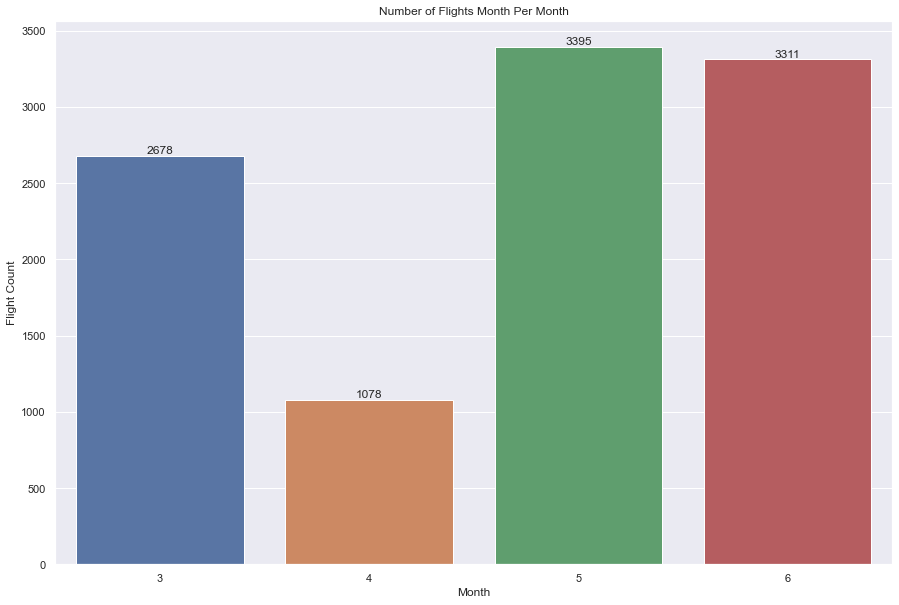

In [41]:
plt.figure(figsize=(15, 10))
plt.title('Number of Flights Month Per Month')
ax=sns.countplot(x='Journey_Month', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.show()

#### Prices Per Airline
The Jet Airways Business prices appear to be high compared to the other airlines.

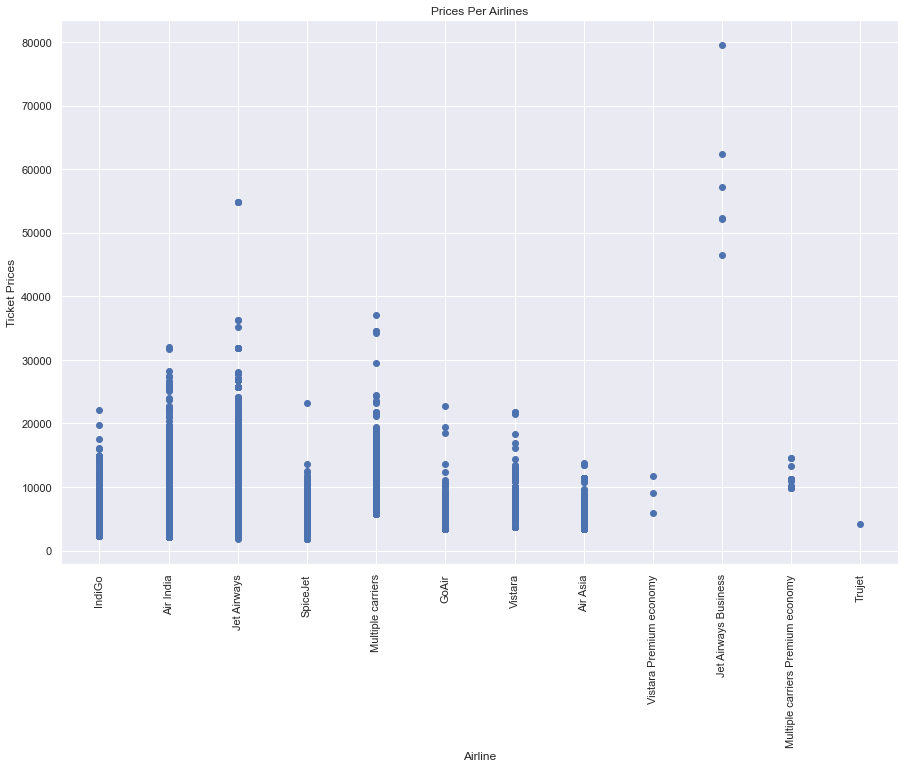

In [42]:
plt.figure(figsize=(15, 10))
plt.title('Prices Per Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Ticket Prices')
plt.show()

#### Number of Flights Per Airline
There are more Jet Airways flights compared to the other airlines.

Jet Airways Business, Vistara Premium economy, Trujet appear to be almost negligible.

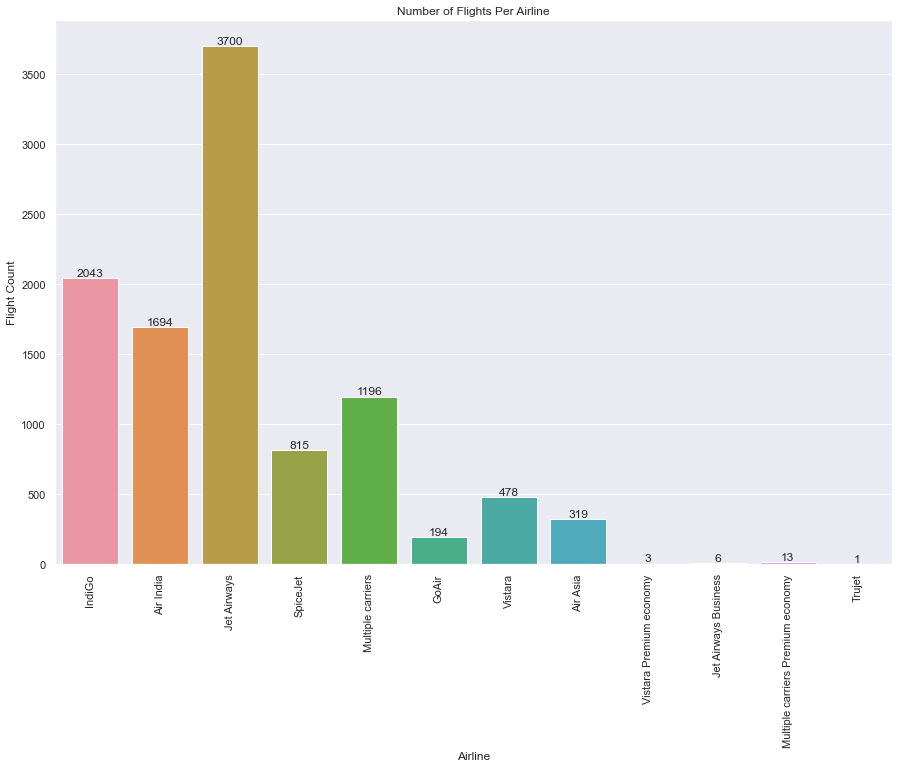

In [43]:
plt.figure(figsize=(15, 10))
plt.title('Number of Flights Per Airline')
ax=sns.countplot(x='Airline', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.ylabel('Flight Count')
plt.show()

In [44]:
# Bucket negligible flights into one category as "Other"
df["Airline"].replace({'Multiple carriers Premium economy':'Other',
                       'Jet Airways Business':'Other',
                       'Vistara Premium economy':'Other',
                       'Trujet':'Other'}, inplace=True)

In [45]:
# Check Airline
df['Airline'].value_counts()

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

#### Prices Per Additional Info
Ticket prices appear to be higher for business class flights.

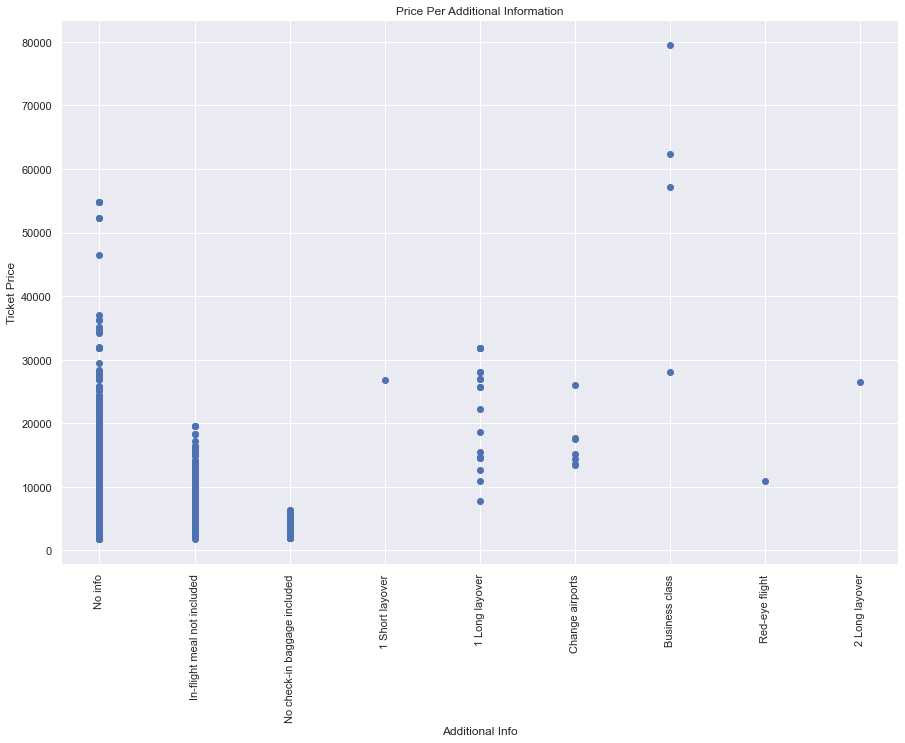

In [46]:
plt.figure(figsize=(15, 10))
plt.title('Price Per Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation=90)
plt.xlabel('Additional Info')
plt.ylabel('Ticket Price')
plt.show()

In [47]:
# Bucket negligible flights into one category as "Other"
df["Additional_Info"].replace({'Change airports':'Other',
                               'Business class':'Other',
                               '1 Short layover':'Other',
                               'Red-eye flight':'Other',
                               '2 Long layover':'Other'}, inplace=True)

In [48]:
# Check Additional Info
df['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             14
Name: Additional_Info, dtype: int64

In [49]:
# Create modified CSV file for analysis
df.to_csv("Dataset_Modified.csv", index=False)

#### Check Correlation
The best variables to look into is Duration, Total_Stops, and Duration + Total_Stops (with the interaction term) for linear regression modeling. Based on checking the scatterplots separately for Duration and Total_Stops against Price, Duration will only be tested since Total_Stops only has 5 options.

<AxesSubplot:>

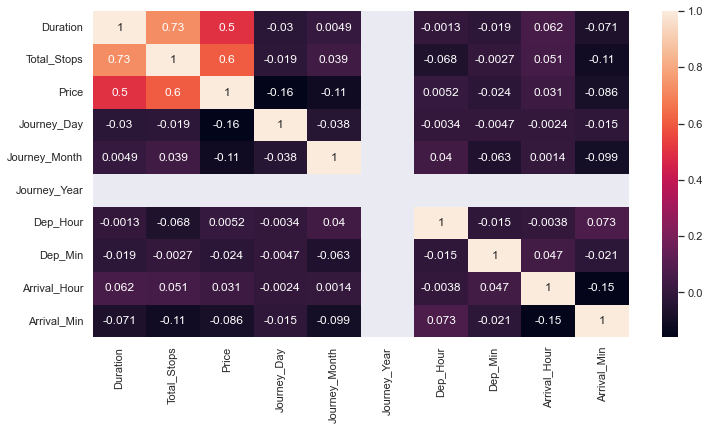

In [50]:
sns.heatmap(df.corr(),annot=True)

##### Check Duration

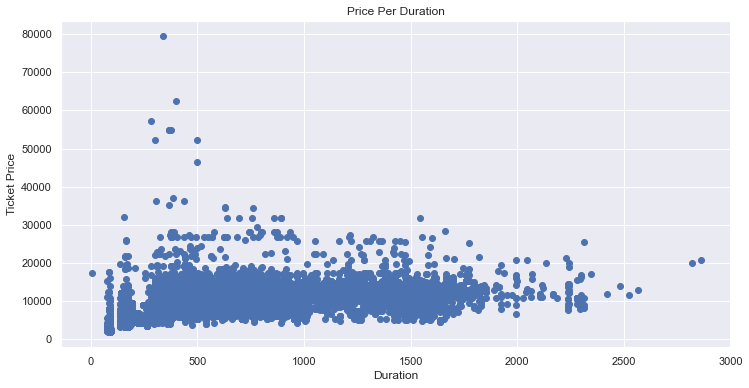

In [51]:
plt.scatter(x=df["Duration"], y=df["Price"])
plt.title('Price Per Duration')
plt.xlabel('Duration')
plt.ylabel('Ticket Price')
plt.show()

##### Check Total_Stops

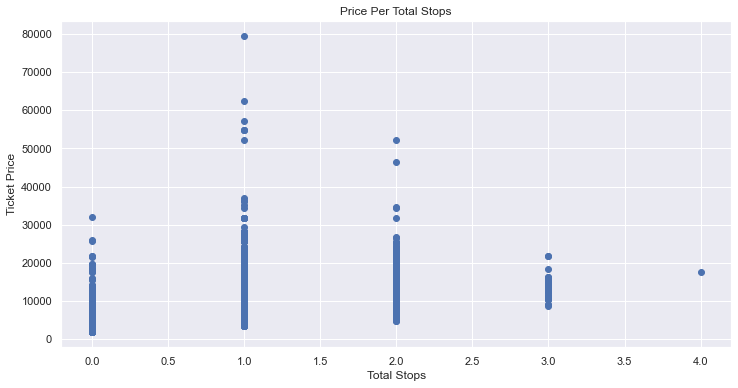

In [52]:
plt.scatter(x=df["Total_Stops"], y=df["Price"])
plt.title('Price Per Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Ticket Price')
plt.show()